<a href="https://colab.research.google.com/github/Praxis-QR/fintech/blob/main/QF_2_Reading_Stock_Market_Data_BSE_Quandl_v21_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png)<br>
<hr>

![alt text](http://1.bp.blogspot.com/-nqAGzznZQNo/UwS8rxjfXeI/AAAAAAAABTA/nunmRLowpps/s1600/PraxisLogo.gif)<br>
http://www.praxis.ac.in
<hr>

[Prithwis Mukerjee](http://www.yantrajaal.com)<br>

#Reading Stock Market Data / BSE / Quandl

Reference : <br>
https://www.quandl.com/data/BSE-Bombay-Stock-Exchange/documentation <br>
https://www.quandl.com/tools/python


##Install Quandl / Set Up

In [1]:
!pip install quandl

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl as q

Get your Quandl Key. [How to get the Quandly API key?](https://help.quandl.com/article/320-where-can-i-find-my-api-key)

In [3]:
#This step is required ONLY if  you have stored your API key in a txt file in your G-Drive
#This step is NOT NECESSARY for students
# Step 1 - Login to G-Drive

from google.colab import drive
drive.mount('/content/drive')

# Step 2 - Copy File
!cp /content/drive/'My Drive'/'Praxis'/WebCredentials/QuandlApiRegistrations_praxis.txt .

# Load the API key
keyFile = open("QuandlApiRegistrations_praxis.txt","r")
qKey = keyFile.readline().rstrip()   # last newline removed
keyFile.close()
#print('Quandl Key = ',qKey)

Mounted at /content/drive


In [4]:
#Faculty will use this command
q.ApiConfig.api_key = qKey

#Students may directly enter the API key here by writing
#q.ApiConfig.api_key = 'yourkeyhere'

In [5]:
#https://www.tutorialspoint.com/How-to-subtract-Python-timedelta-from-date-in-Python
#
from datetime import date, timedelta
interval = 365  # 1 year
endDate = date.today() - timedelta(days=1)
startDate = date.today() - timedelta(days=interval+1)
print('Start Date :',startDate)
print('End Date   :', endDate)

Start Date : 2021-03-05
End Date   : 2022-03-05


#Get BSE Data <br>
BSE Codes are <br>
Hdfc Bank Ltd EOD Prices|BOM500180 <br>
Hindustan Unilever Ltd. EOD Prices|BOM500696 <br>
Larsen & Toubro Ltd. EOD Prices|BOM500510 <br>
Tata Steel Ltd. EOD Prices|BOM500470 <br>
[Full List of Companies](https://s3.amazonaws.com/quandl-production-static/BSE+Descriptions/stocks.txt)<br>
BSE SENSEX|SENSEX <br> [Full List of Indexes](https://s3.amazonaws.com/quandl-production-static/BSE+Descriptions/indices.txt)


#Basic Chart

In [7]:
# Daily Data, All Columns

symbol = 'BSE/BOM500470'       # Tata Steel
df = q.get(symbol,start_date=startDate, end_date=endDate)
df.head(2)

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2021-03-05,750.0,756.15,727.1,733.30,741.24,880587.0,16865.0,652730315.0,132619.0,15.06,29.05,-16.70
2021-03-08,744.9,751.00,735.0,737.35,744.33,544330.0,9971.0,405162933.0,93113.0,17.11,16.00,-7.55


In [8]:
df.tail(2)

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2022-03-03,1305.0,1328.1,1293.85,1303.15,1310.48,712074.0,26724.0,933158098.0,160803.0,22.58,34.25,-1.85
2022-03-04,1303.0,1320.0,1273.50,1277.40,1298.82,719184.0,28936.0,934089787.0,99359.0,13.82,46.50,-25.60


In [9]:
#df.columns
dropCols = ['WAP', 'No. of Trades','Total Turnover', 'Deliverable Quantity', '% Deli. Qty to Traded Qty','Spread H-L', 'Spread C-O']
df.drop(dropCols,axis=1,inplace=True)
df.head(3)

,Open,High,Low,Close,No. of Shares
Date,,,,,
2021-03-05,750.0,756.15,727.1,733.30,880587.0
2021-03-08,744.9,751.00,735.0,737.35,544330.0
2021-03-09,743.0,750.90,702.0,706.60,918648.0


In [10]:
df.rename(columns={'No. of Shares':'Volume'}, inplace=True)
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-05,750.0,756.15,727.1,733.30,880587.0
2021-03-08,744.9,751.00,735.0,737.35,544330.0
2021-03-09,743.0,750.90,702.0,706.60,918648.0


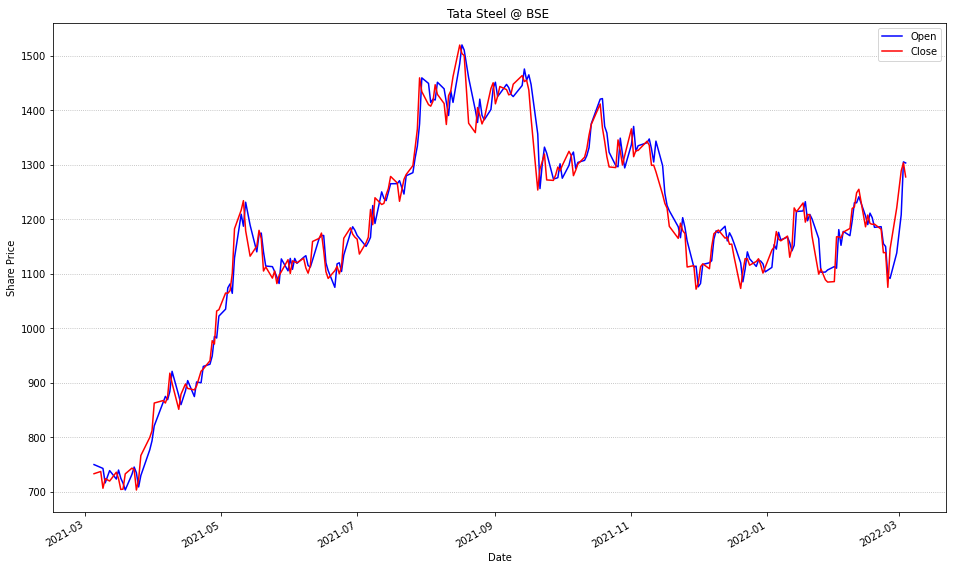

In [11]:
# Plotting directly from DataFrames with Pandas
df.plot(
    y=['Open', 'Close'],
    kind='line', 
    legend=False, 
    color=['blue','red'],
    figsize=(16,10)
)

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Share Price')
plt.xlabel("Date")
plt.title("Tata Steel @ BSE ")
plt.legend()
plt.gca().yaxis.grid(linestyle=':')

#Technical Charts <br>
https://pypi.org/project/mplfinance/ <br>
https://github.com/matplotlib/mplfinance/tree/master/examples

In [12]:
!pip install mplfinance
import mplfinance as mpf

     |████████████████████████████████| 70 kB 3.6 MB/s 


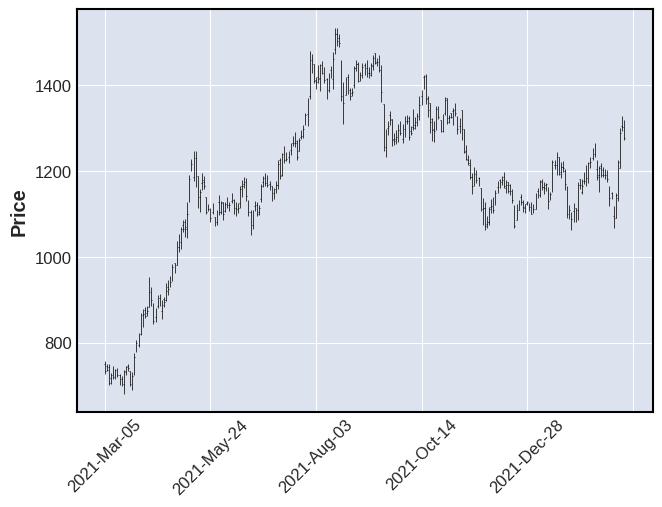

In [13]:
#very basic usage
mpf.plot(df)

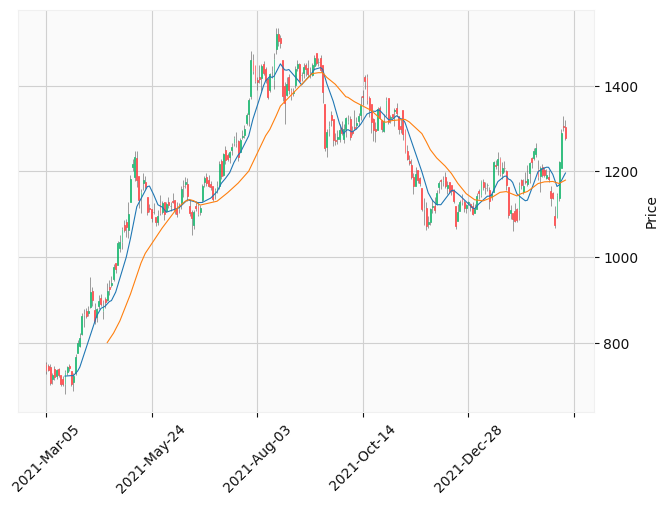

In [14]:
#add moving average and candles
mpf.plot(df, type='candle',mav=(10,30), style='yahoo')

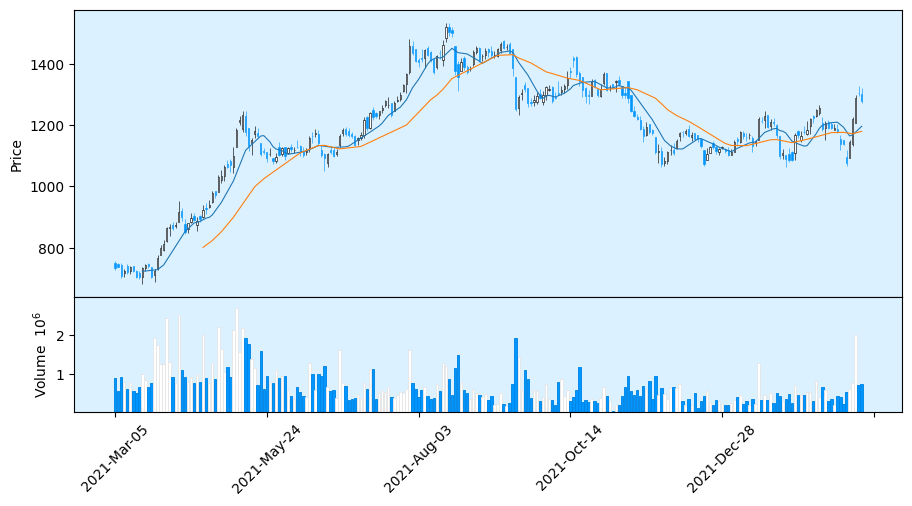

In [15]:
#add volume
mpf.plot(df, type='candle',mav=(10,30), style='blueskies', volume=True,figratio=(20,10))

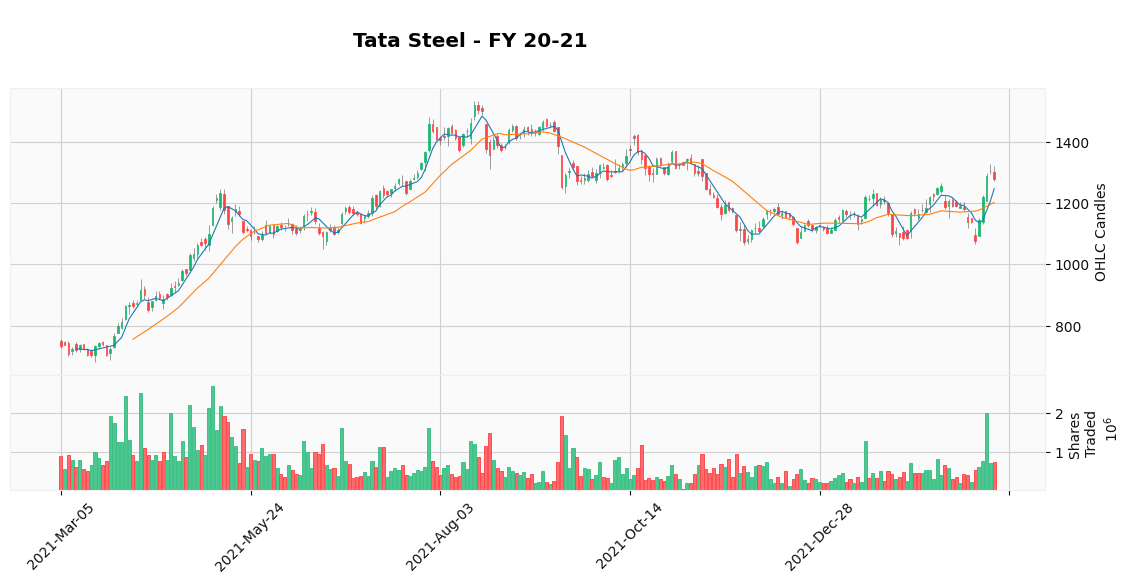

In [16]:
mpf.plot(df, type='candle',
         style='yahoo',
         mav=(5,20),
         volume=True, 
         figratio=(30,12),
         title='\nTata Steel - FY 20-21',
         ylabel='OHLC Candles',
         ylabel_lower='Shares \nTraded')

##Multiple Companies

In [17]:
symbol = ['BSE/BOM500180', 'BSE/BOM500696']     # HDFC, Hindustan Lever

In [ ]:
#symbol = 'BSE/BOM500470'       # Tata Steel

In [18]:
#Two Companies, All Columns

df2Com = q.get(symbol,start_date=startDate, end_date=endDate)
df2Com.head(3)

,BSE/BOM500180 - Open,BSE/BOM500180 - High,BSE/BOM500180 - Low,BSE/BOM500180 - Close,BSE/BOM500180 - WAP,BSE/BOM500180 - No. of Shares,BSE/BOM500180 - No. of Trades,BSE/BOM500180 - Total Turnover,BSE/BOM500180 - Deliverable Quantity,BSE/BOM500180 - % Deli. Qty to Traded Qty,...,BSE/BOM500696 - Low,BSE/BOM500696 - Close,BSE/BOM500696 - WAP,BSE/BOM500696 - No. of Shares,BSE/BOM500696 - No. of Trades,BSE/BOM500696 - Total Turnover,BSE/BOM500696 - Deliverable Quantity,BSE/BOM500696 - % Deli. Qty to Traded Qty,BSE/BOM500696 - Spread H-L,BSE/BOM500696 - Spread C-O
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-05,1531.8,1545.45,1520.65,1529.65,1532.85,323365.0,18262.0,495671364.0,95717.0,29.60,...,2176.25,2201.80,2196.22,64108.0,3685.0,140795534.0,29881.0,46.61,33.75,12.35
2021-03-08,1541.0,1555.50,1512.65,1519.40,1532.26,192563.0,7066.0,295057079.0,43003.0,22.33,...,2170.00,2174.45,2193.95,83753.0,8505.0,183749648.0,36427.0,43.49,45.00,-37.55
2021-03-09,1540.0,1565.00,1539.95,1562.65,1557.51,220421.0,7642.0,343308697.0,82535.0,37.44,...,2162.45,2198.10,2181.69,28452.0,2156.0,62073574.0,8000.0,28.12,42.05,18.10


In [19]:
# Two Companies, ONLY close Data
cols = ['BSE/BOM500180.4', 'BSE/BOM500696.4']     # HDFC, Hindustan Lever, 4th column contains close data

df2Com = q.get(cols,start_date=startDate, end_date=endDate)
df2Com.head(3)

,BSE/BOM500180 - Close,BSE/BOM500696 - Close
Date,,
2021-03-05,1529.65,2201.80
2021-03-08,1519.40,2174.45
2021-03-09,1562.65,2198.10


In [ ]:
# why do we need this step?

#df2Com.reset_index(level=0, inplace=True)
#df2Com.head(3)

In [20]:
df2Com = df2Com.rename(columns = {"BSE/BOM500180 - Close":"HDFC","BSE/BOM500696 - Close":"HindLever"})
df2Com.head()

,HDFC,HindLever
Date,,
2021-03-05,1529.65,2201.80
2021-03-08,1519.40,2174.45
2021-03-09,1562.65,2198.10
2021-03-10,1555.80,2227.95
2021-03-12,1551.65,2205.80


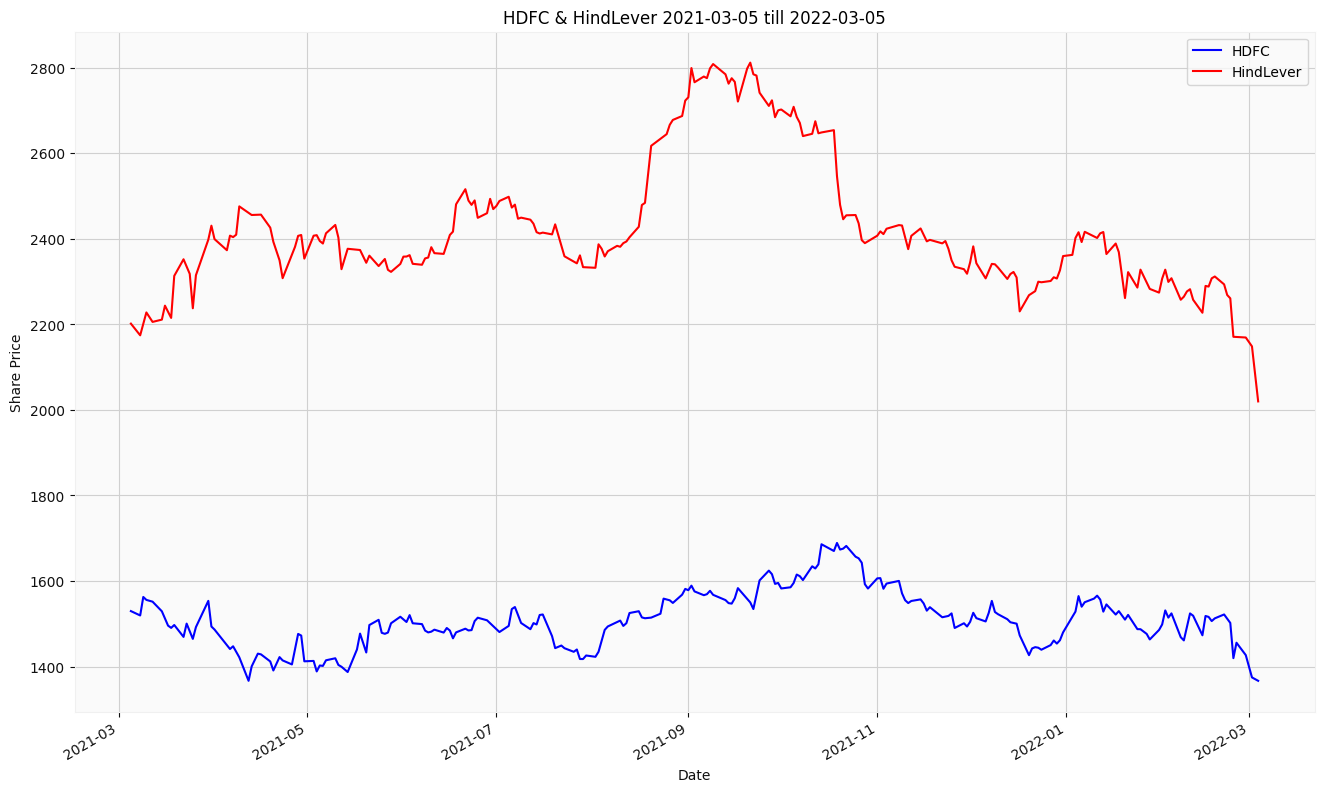

In [21]:
# Plotting directly from DataFrames with Pandas
df2Com.plot(
    y=['HDFC', 'HindLever'],
    kind='line', 
    legend=False, 
    color=['blue','red'],
    figsize=(16,10)
    
)

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Share Price')
plt.xlabel("Date")
plt.title("HDFC & HindLever "+str(startDate)+" till "+str(endDate))
plt.legend()
#plt.gca().yaxis.grid(linestyle=':')

In [22]:
# FOUR Companies, ONLY close Data
cols = ['BSE/BOM500180.4', 'BSE/BOM500696.4','BSE/BOM500510.4', 'BSE/BOM500470.4']     # HDFC, Hindustan Lever, L&T, TataSteel

df4Com = q.get(cols,start_date=startDate, end_date=endDate)
df4Com.head(3)

,BSE/BOM500180 - Close,BSE/BOM500696 - Close,BSE/BOM500510 - Close,BSE/BOM500470 - Close
Date,,,,
2021-03-05,1529.65,2201.80,1463.60,733.30
2021-03-08,1519.40,2174.45,1513.85,737.35
2021-03-09,1562.65,2198.10,1508.25,706.60


In [ ]:
# why do we need this step?

#df4Com.reset_index(level=0, inplace=True)
#df4Com.head(3)

In [23]:
df4Com = df4Com.rename(columns = {"BSE/BOM500180 - Close":"HDFC","BSE/BOM500696 - Close":"HindLever","BSE/BOM500510 - Close":"L&T","BSE/BOM500470 - Close":"TataSteel"})
df4Com.head()

,HDFC,HindLever,L&T,TataSteel
Date,,,,
2021-03-05,1529.65,2201.80,1463.60,733.30
2021-03-08,1519.40,2174.45,1513.85,737.35
2021-03-09,1562.65,2198.10,1508.25,706.60
2021-03-10,1555.80,2227.95,1524.10,724.20
2021-03-12,1551.65,2205.80,1514.35,719.85


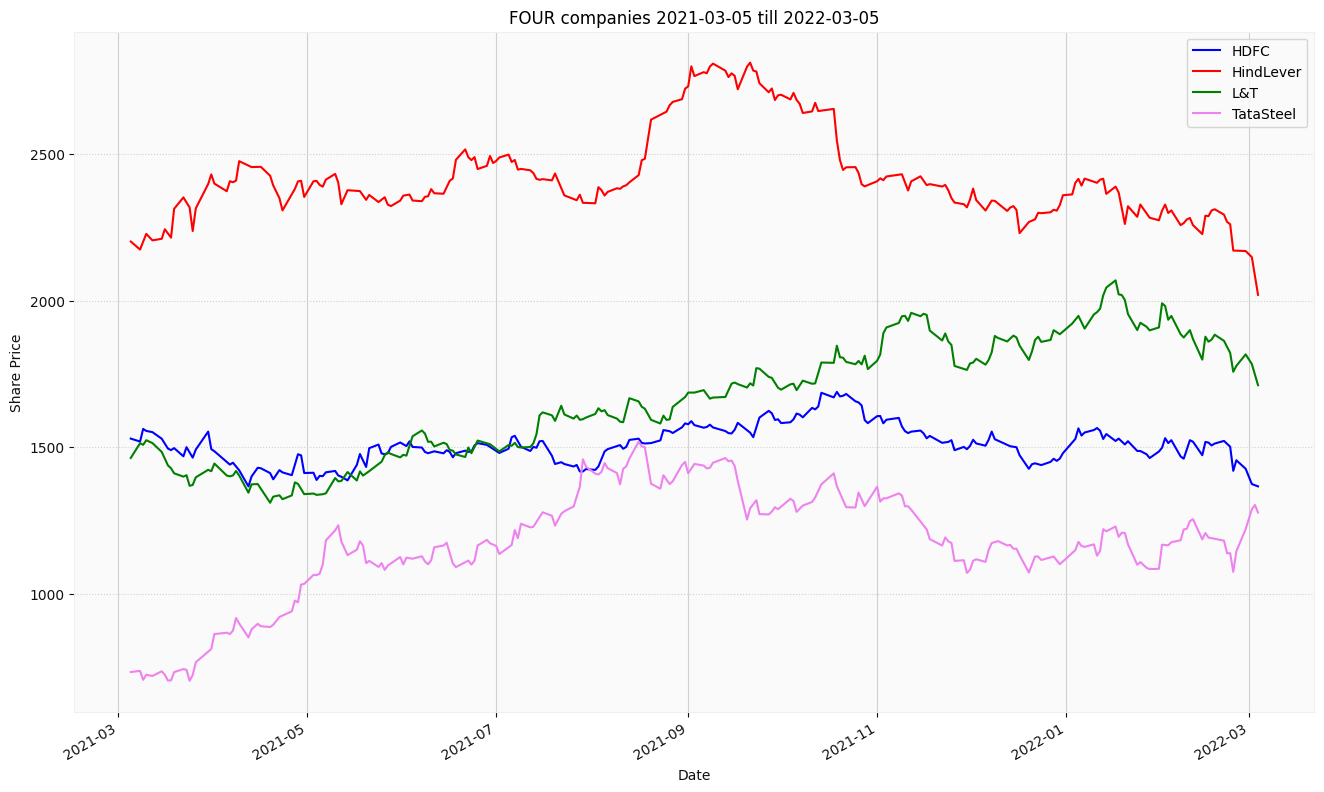

In [24]:
# Plotting directly from DataFrames with Pandas
df4Com.plot(
    y=['HDFC', 'HindLever','L&T','TataSteel'],
    kind='line', 
    legend=False, 
    color=['blue','red', 'green','violet'],
    figsize=(16,10)
    
)

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Share Price')
plt.xlabel("Date")
plt.title("FOUR companies "+str(startDate)+" till "+str(endDate))
plt.legend()
plt.gca().yaxis.grid(linestyle=':')

In [25]:
#Let us scale the Data
df4ComN = df4Com.copy()
df4ComN['HDFC'] = df4ComN['HDFC']/df4ComN.iloc[0]['HDFC']
df4ComN['HindLever'] = df4ComN['HindLever']/df4ComN.iloc[0]['HindLever']
df4ComN['L&T'] = df4ComN['L&T']/df4ComN.iloc[0]['L&T']
df4ComN['TataSteel'] = df4ComN['TataSteel']/df4ComN.iloc[0]['TataSteel']
df4ComN.head()

,HDFC,HindLever,L&T,TataSteel
Date,,,,
2021-03-05,1.000000,1.000000,1.000000,1.000000
2021-03-08,0.993299,0.987578,1.034333,1.005523
2021-03-09,1.021574,0.998320,1.030507,0.963589
2021-03-10,1.017095,1.011877,1.041336,0.987590
2021-03-12,1.014382,1.001817,1.034675,0.981658


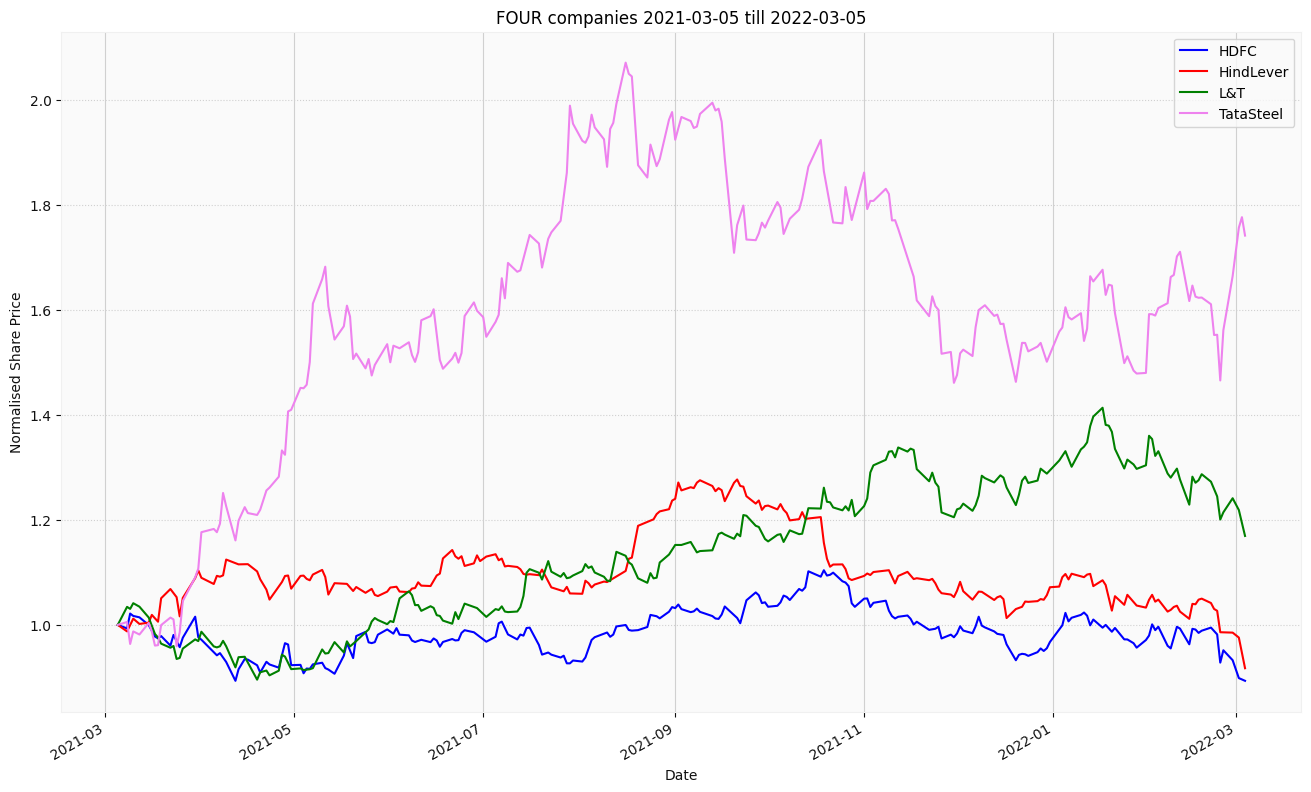

In [26]:
# Plotting directly from DataFrames with Pandas
df4ComN.plot(
    y=['HDFC', 'HindLever','L&T','TataSteel'],
    kind='line', 
    legend=False, 
    color=['blue','red', 'green','violet'],
    figsize=(16,10)
    
)

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Normalised Share Price')
plt.xlabel("Date")
plt.title("FOUR companies "+str(startDate)+" till "+str(endDate))
plt.legend()
plt.gca().yaxis.grid(linestyle=':')

#Monthly Data

In [27]:
#Currently we have data for each trading day -- too much data 
#How to reduce the data
df4Com.count()

HDFC         247
HindLever    247
L&T          247
TataSteel    247
dtype: int64

In [28]:
# FOUR Companies, ONLY close Data
cols = ['BSE/BOM500180.4', 'BSE/BOM500696.4','BSE/BOM500510.4', 'BSE/BOM500470.4']     # HDFC, Hindustan Lever, L&T, TataSteel

df4Com_1 = q.get(cols,start_date=startDate, end_date=endDate)
df4Com_1.head(3)

,BSE/BOM500180 - Close,BSE/BOM500696 - Close,BSE/BOM500510 - Close,BSE/BOM500470 - Close
Date,,,,
2021-03-05,1529.65,2201.80,1463.60,733.30
2021-03-08,1519.40,2174.45,1513.85,737.35
2021-03-09,1562.65,2198.10,1508.25,706.60


In [29]:
# FOUR Companies, ONLY close Data, End of Month data only
# Get only end of Month data

cols = ['BSE/BOM500180.4', 'BSE/BOM500696.4','BSE/BOM500510.4', 'BSE/BOM500470.4']     # HDFC, Hindustan Lever, L&T, TataSteel

df4Com_M1 = q.get(cols,collapse='monthly',start_date=startDate, end_date=endDate)
df4Com_M1

,BSE/BOM500180 - Close,BSE/BOM500696 - Close,BSE/BOM500510 - Close,BSE/BOM500470 - Close
Date,,,,
2021-03-31,1493.55,2430.80,1418.35,811.95
2021-04-30,1412.20,2353.85,1340.20,1033.95
2021-05-31,1516.40,2341.35,1465.55,1125.65
2021-06-30,1498.05,2469.60,1501.25,1166.85
2021-07-31,1425.80,2334.05,1601.40,1433.75
2021-08-31,1581.50,2723.25,1671.40,1450.05
2021-09-30,1595.50,2700.45,1703.15,1288.55
2021-10-31,1582.35,2393.95,1766.80,1316.65
2021-11-30,1493.60,2318.45,1763.90,1071.60


In [30]:
df4Com_M2 = df4Com_1.resample('M').mean()
df4Com_M2

,BSE/BOM500180 - Close,BSE/BOM500696 - Close,BSE/BOM500510 - Close,BSE/BOM500470 - Close
Date,,,,
2021-03-31,1511.632353,2271.191176,1442.994118,736.050000
2021-04-30,1428.831579,2404.692105,1369.486842,914.960526
2021-05-31,1444.802500,2369.715000,1405.437500,1127.902500
2021-06-30,1493.327273,2414.906818,1505.361364,1130.709091
2021-07-31,1477.519048,2416.161905,1559.173810,1259.269048
2021-08-31,1514.176190,2498.119048,1620.588095,1424.597619
2021-09-30,1574.371429,2762.328571,1707.707143,1371.038095
2021-10-31,1634.897500,2568.215000,1760.795000,1324.602500
2021-11-30,1547.507500,2391.135000,1882.015000,1239.195000


#Moving Averages

In [31]:
# Daily Data, All Columns

symbol = 'BSE/BOM500696'       # Hindustan Lever
dfCompany = q.get(symbol,start_date=startDate, end_date=endDate)
dfCompany.head(5)

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2021-03-05,2189.45,2210.0,2176.25,2201.80,2196.22,64108.0,3685.0,140795534.0,29881.0,46.61,33.75,12.35
2021-03-08,2212.00,2215.0,2170.00,2174.45,2193.95,83753.0,8505.0,183749648.0,36427.0,43.49,45.00,-37.55
2021-03-09,2180.00,2204.5,2162.45,2198.10,2181.69,28452.0,2156.0,62073574.0,8000.0,28.12,42.05,18.10
2021-03-10,2216.50,2237.1,2193.50,2227.95,2225.42,163025.0,6009.0,362799363.0,114017.0,69.94,43.60,11.45
2021-03-12,2230.00,2237.9,2200.05,2205.80,2214.08,157078.0,10184.0,347783499.0,86100.0,54.81,37.85,-24.20


In [ ]:
# why do we need this step?

#dfCompany.reset_index(level=0, inplace=True)
#dfCompany.head(3)

In [32]:
dfCharts = dfCompany[['Close','No. of Shares','No. of Trades']]
dfCharts = dfCharts.rename(columns ={'No. of Shares':'Vol','No. of Trades':'Trades'})
dfCharts

,Close,Vol,Trades
Date,,,
2021-03-05,2201.80,64108.0,3685.0
2021-03-08,2174.45,83753.0,8505.0
2021-03-09,2198.10,28452.0,2156.0
2021-03-10,2227.95,163025.0,6009.0
2021-03-12,2205.80,157078.0,10184.0
...,...,...,...
2022-02-25,2170.55,71350.0,6656.0
2022-02-28,2169.35,59381.0,5242.0
2022-03-02,2148.60,85593.0,7650.0


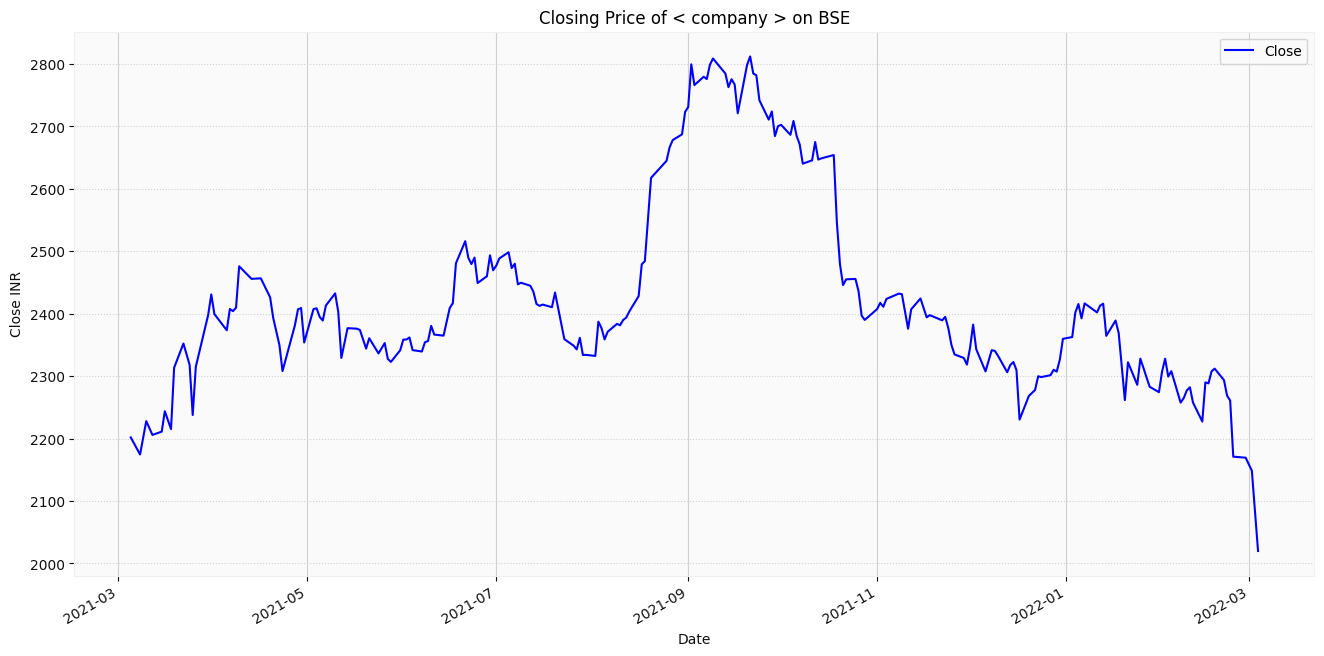

In [33]:
# Plotting directly from DataFrames with Pandas
dfCharts.plot( 
    y=['Close'],
    kind='line', 
    legend=True, 
    color=['blue'],
    figsize=(16,8)
)

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Close INR')
plt.xlabel("Date")
plt.title("Closing Price of < company > on BSE")
plt.legend()
plt.gca().yaxis.grid(linestyle=':')

In [34]:
#dfCharts['SMA10']= dfCharts.iloc[:,1].rolling(window=10).mean()
dfCharts['SMA10']= dfCharts['Close'].rolling(window=10).mean()
dfCharts.head(20)

,Close,Vol,Trades,SMA10
Date,,,,
2021-03-05,2201.80,64108.0,3685.0,NaN
2021-03-08,2174.45,83753.0,8505.0,NaN
2021-03-09,2198.10,28452.0,2156.0,NaN
2021-03-10,2227.95,163025.0,6009.0,NaN
2021-03-12,2205.80,157078.0,10184.0,NaN
2021-03-15,2211.15,119846.0,8242.0,NaN
2021-03-16,2243.80,132311.0,8571.0,NaN
2021-03-17,2229.20,115225.0,5266.0,NaN
2021-03-18,2215.15,109413.0,9155.0,NaN


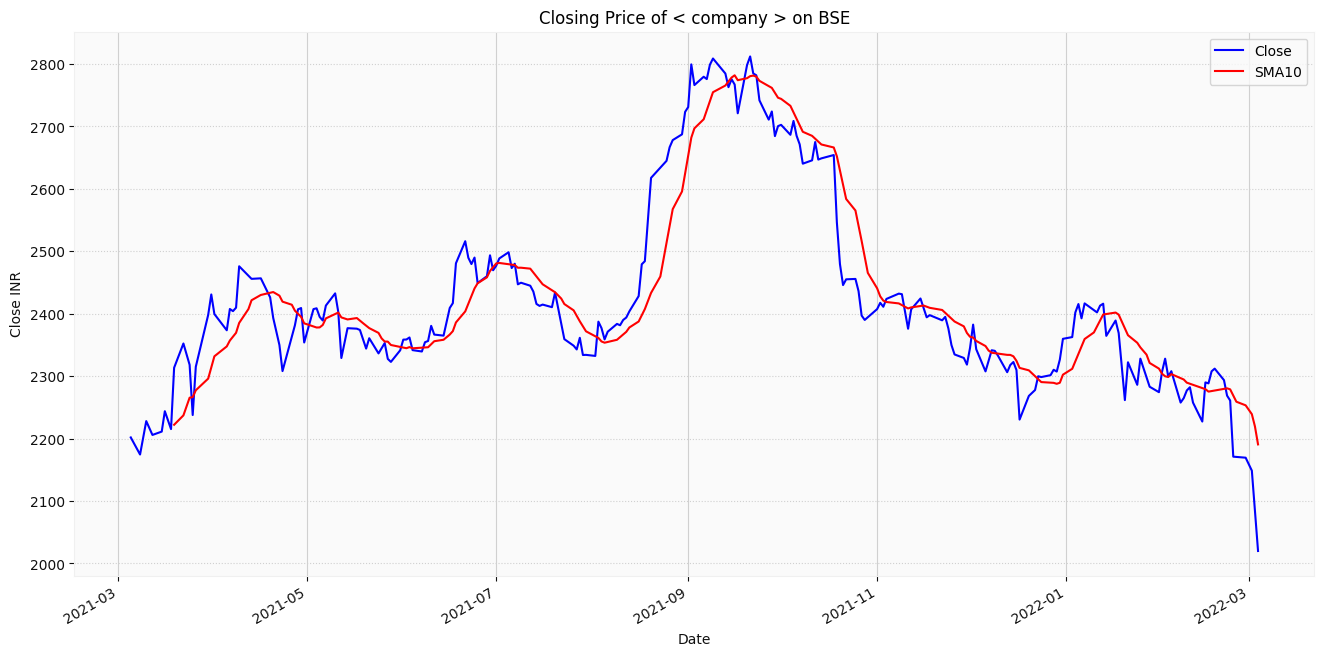

In [35]:
# Plotting directly from DataFrames with Pandas
dfCharts.plot( 
    y=['Close','SMA10'],
    kind='line', 
    legend=True, 
    color=['blue','red'],
    figsize=(16,8)
)

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Close INR')
plt.xlabel("Date")
plt.title("Closing Price of < company > on BSE")
plt.legend()
plt.gca().yaxis.grid(linestyle=':')

In [36]:
dfCharts['SMA30']= dfCharts['Close'].rolling(window=30).mean()
dfCharts.head()

,Close,Vol,Trades,SMA10,SMA30
Date,,,,,
2021-03-05,2201.80,64108.0,3685.0,NaN,NaN
2021-03-08,2174.45,83753.0,8505.0,NaN,NaN
2021-03-09,2198.10,28452.0,2156.0,NaN,NaN
2021-03-10,2227.95,163025.0,6009.0,NaN,NaN
2021-03-12,2205.80,157078.0,10184.0,NaN,NaN


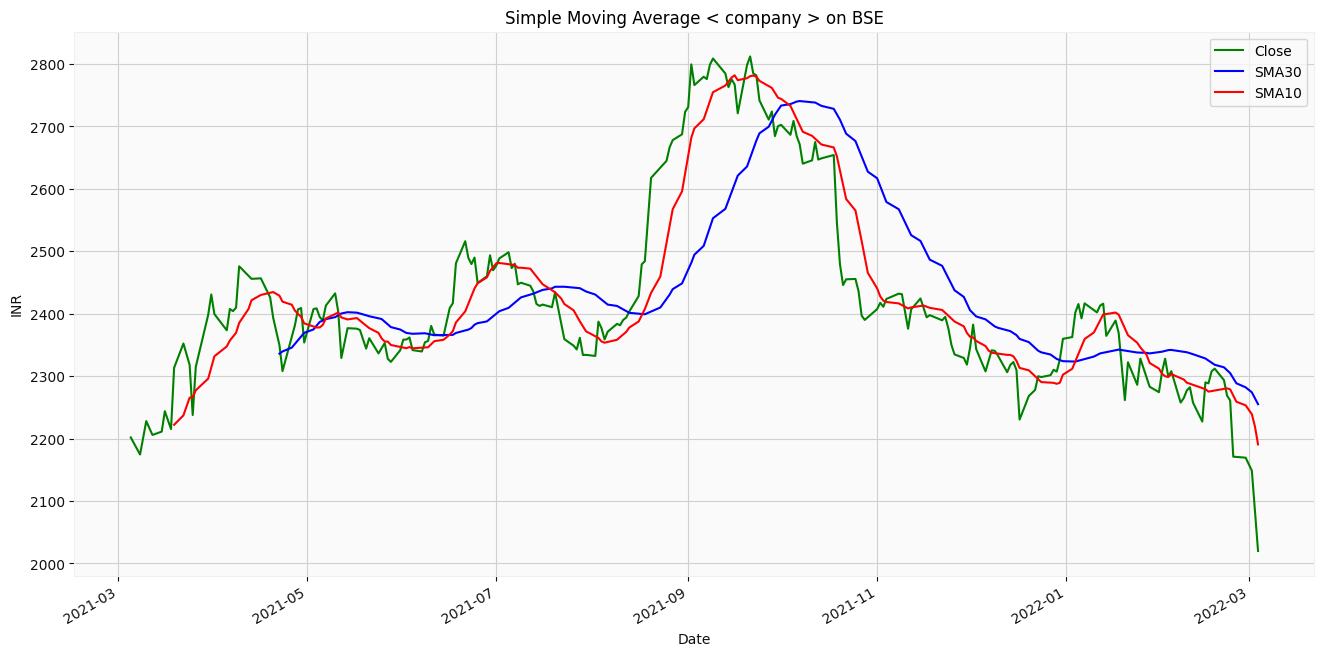

In [37]:
# Plotting directly from DataFrames with Pandas
dfCharts.plot( 
    y=['Close','SMA30','SMA10'],
    kind='line', 
    legend=True, 
    color=['green','blue','red'],
    figsize=(16,8)
)

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('INR')
plt.xlabel("Date")
plt.title("Simple Moving Average < company > on BSE")
plt.legend()
#plt.gca().yaxis.grid(linestyle=':')

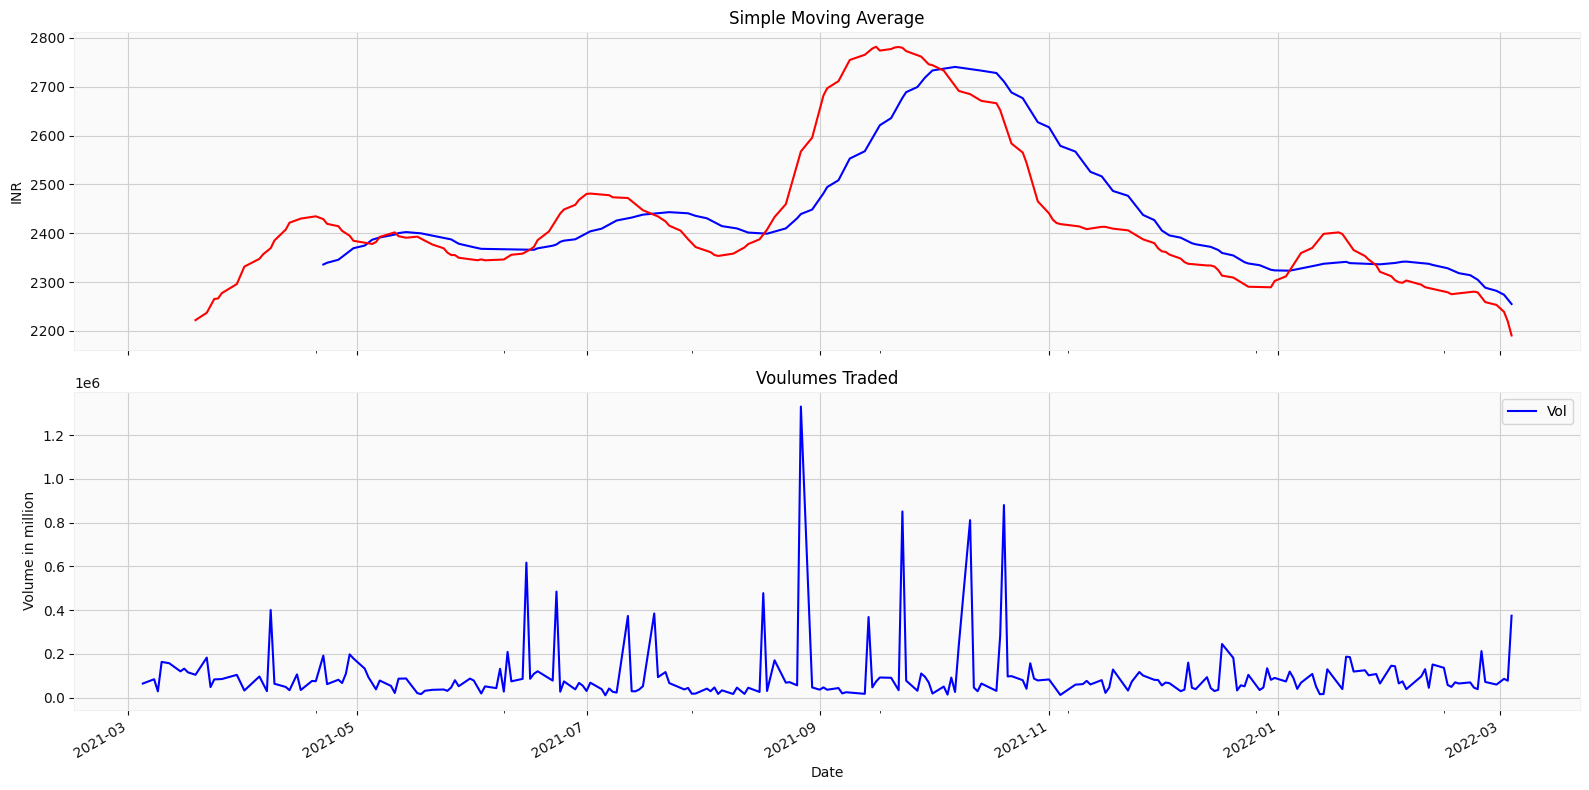

In [38]:
# Plotting directly from DataFrames with Pandas

figure, axes = plt.subplots(2, 1,sharex='col')

dfCharts.plot(
    ax=axes[0],
    title='Simple Moving Average', 
    y=['SMA30','SMA10'],
    kind='line', 
    legend=False, 
    color=['blue','red'],
    figsize=(16,16),
    ylabel='INR',
    xlabel='Date',
)


#plt.legend()

dfCharts.plot(
    ax=axes[1],
    title='Voulumes Traded',
    y=['Vol'],
    kind='line', 
    legend=True, 
    color=['blue'],
    figsize=(16,8),
    ylabel=('Volume in million'),
    xlabel=('Date')
)

figure.tight_layout()

#Chronobooks <br>
![alt text](https://1.bp.blogspot.com/-lTiYBkU2qbU/X1er__fvnkI/AAAAAAAAjtE/GhDR3OEGJr4NG43fZPodrQD5kbxtnKebgCLcBGAsYHQ/s600/Footer2020-600x200.png)<hr>
Chronotantra and Chronoyantra are two science fiction novels that explore the collapse of human civilisation on Earth and then its rebirth and reincarnation both on Earth as well as on the distant worlds of Mars, Titan and Enceladus. But is it the human civilisation that is being reborn? Or is it some other sentience that is revealing itself. 
If you have an interest in AI and found this material useful, you may consider buying these novels, in paperback or kindle, from [http://bit.ly/chronobooks](http://bit.ly/chronobooks)